<a href="https://colab.research.google.com/github/aissahm/image_analysis/blob/main/task1_model_performance_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import os
from google.colab import files

!pip install ipython-autotime
%load_ext autotime

time: 2.37 ms


In [16]:
def computeScoresPerKernel(resultsDf):
  nkernelsarray = resultsDf.kernelID.unique()
  pixelsActivatedScoresArray = []
  outsidePlateDeactivatedPixelsScoresArray = []
  kernelIDArray = []

  for kernelID in nkernelsarray: 
    kernelPlatePixelsActivatedDf = resultsDf[(resultsDf.kernelID == kernelID ) & (resultsDf.percentagePlatePixelsActivated > -1)].copy()
    kernelOutsidePlateDeactivatedDf = resultsDf[resultsDf.kernelID == kernelID ].copy()
    averageOutsidePixelsDeactivated = kernelOutsidePlateDeactivatedDf.percentageDeactivatedPixelsOutsidePlate.mean()
    averagePlatePixelsActivated = 0
    if kernelPlatePixelsActivatedDf.percentagePlatePixelsActivated.count() > 0:
      averagePlatePixelsActivated = kernelPlatePixelsActivatedDf.percentagePlatePixelsActivated.mean()
    pixelsActivatedScoresArray.append( 100*averagePlatePixelsActivated)
    outsidePlateDeactivatedPixelsScoresArray.append(100*(1- averageOutsidePixelsDeactivated))
    kernelIDArray.append("kernel_" + str(kernelID))
  
  return [kernelIDArray, pixelsActivatedScoresArray, outsidePlateDeactivatedPixelsScoresArray]

#plots the two scores to view results per kernel
def plotScores(modelScoresArray):

  fig, ax = plt.subplots()
  ax.scatter(modelScoresArray[1], modelScoresArray[2])

  plt.title("Average scores per kernel")
  plt.xlabel("% activated pixels inside plate region")
  plt.ylabel("% deactivated pixels outside plate region")

  for i, txt in enumerate(modelScoresArray[0]):
      ax.annotate(txt, (modelScoresArray[1][i], modelScoresArray[2][i]))

time: 14.8 ms


In [ ]:
modelOptionsObj1 = {"batchnormalization": True, "kernelBank":{"nkernels": 10, "width": 3, "height": 3, "nbands": 3, "normalized":True }}
modelOptionsObj2 = {"batchnormalization": False, "kernelBank":{"nkernels": 10, "width": 3, "height": 3, "nbands": 3, "normalized":True }}
modelOptionsObj3 = {"batchnormalization": True, "kernelBank":{"nkernels": 10, "width": 3, "height": 3, "nbands": 3, "normalized":False }}
modelOptionsObj4 = {"batchnormalization": True, "kernelBank":{"nkernels": 10, "width": 5, "height": 5, "nbands": 3, "normalized":True }}
modelOptionsObj5 = {"batchnormalization": True, "kernelBank":{"nkernels": 10, "width": 7, "height": 3, "nbands": 3, "normalized":True }}

In [7]:
def showResults(dataframeCSVPath):
  modeldataframe =  pd.read_csv(dataframeCSVPath)
  modelscores = computeScoresPerKernel(modeldataframe)

  print("Scores")
  print(modelscores)

  plotScores(modelscores)

time: 2.46 ms


Scores
[['kernel_0', 'kernel_1', 'kernel_2', 'kernel_3', 'kernel_4', 'kernel_5', 'kernel_6', 'kernel_7', 'kernel_8', 'kernel_9'], [31.00055730648817, 87.19166739646317, 84.37730627194375, 72.94075420941701, 18.216095187191616, 77.68316194214432, 82.3021720133085, 16.310770470817246, 84.14605501227035, 27.175627335892337], [34.07290699440606, 44.29439063395859, 50.503643893643414, 39.64367700863558, 59.276218239955234, 33.90983899446939, 36.013892335934614, 51.90619065826183, 44.69392877453975, 64.7943762760653]]
Scores
[['kernel_0', 'kernel_1', 'kernel_2', 'kernel_3', 'kernel_4', 'kernel_5', 'kernel_6', 'kernel_7', 'kernel_8', 'kernel_9'], [13.11411695835481, 59.27186987023199, 66.11341441159219, 84.31047180675061, 86.01234439256099, 75.79752410991463, 62.79685674989247, 82.74450223185914, 88.20066484123596, 66.82793141796766], [50.82516045284544, 21.638745297659234, 67.94560670788489, 14.156714908124801, 8.097441431756858, 50.02345920827476, 18.402835912948913, 46.26671708310124, 20.1

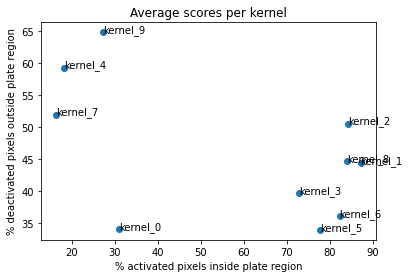

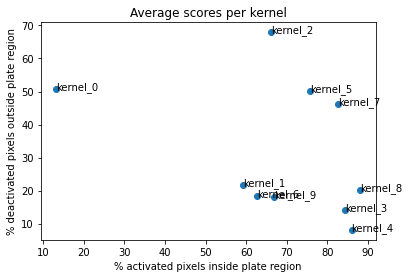

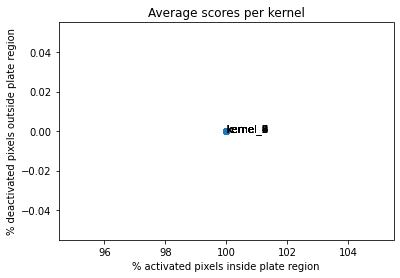

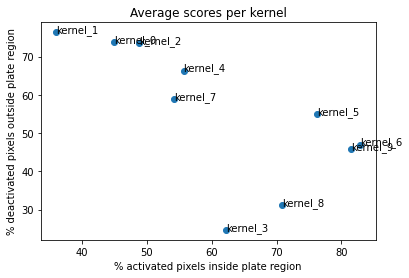

time: 1.27 s


In [22]:
showResults("/content/model1_Trainset1results.csv")

showResults("/content/model2_Trainset1results.csv")

showResults("/content/model3_Trainset1results.csv")

showResults("/content/model5_Trainset1results.csv")

Scores
[['kernel_0', 'kernel_1', 'kernel_2', 'kernel_3', 'kernel_4', 'kernel_5', 'kernel_6', 'kernel_7', 'kernel_8', 'kernel_9'], [13.11411695835481, 59.27186987023199, 66.11341441159219, 84.31047180675061, 86.01234439256099, 75.79752410991463, 62.79685674989247, 82.74450223185914, 88.20066484123596, 66.82793141796766], [50.82516045284544, 21.638745297659234, 67.94560670788489, 14.156714908124801, 8.097441431756858, 50.02345920827476, 18.402835912948913, 46.26671708310124, 20.158427373637323, 17.951398357151117]]


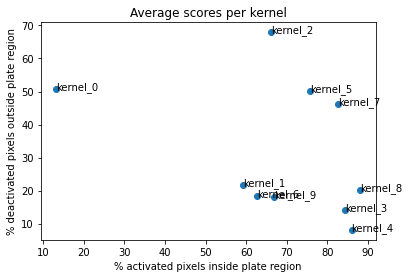

time: 416 ms


In [18]:
showResults("/content/model2_Trainset1results.csv")

Scores
[['kernel_0', 'kernel_1', 'kernel_2', 'kernel_3', 'kernel_4', 'kernel_5', 'kernel_6', 'kernel_7', 'kernel_8', 'kernel_9'], [14.451439837754416, 63.003846500905524, 62.4253658801409, 88.32998236479757, 87.25796102060882, 75.35075385491113, 66.74903518161632, 82.27222932542239, 88.36062604014697, 71.02152802324602], [50.60902190563644, 22.13413318879448, 68.1413266865713, 14.689728063085782, 7.761938900587961, 50.1740567116751, 19.05414702896966, 46.3619302012676, 19.789064069629504, 18.63214607477791]]


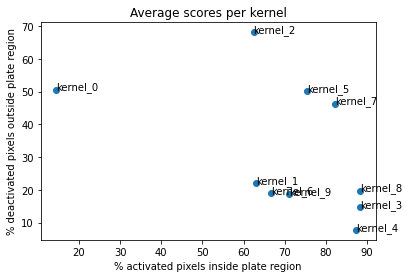

time: 342 ms


In [19]:
showResults("/content/model2_Testset1results.csv")

Scores
[['kernel_0', 'kernel_1', 'kernel_2', 'kernel_3', 'kernel_4', 'kernel_5', 'kernel_6', 'kernel_7', 'kernel_8', 'kernel_9'], [44.983420888296685, 36.01121980088245, 48.74521537501934, 62.24003519356251, 55.66938457256059, 76.1970288957185, 82.92524531916897, 54.255481296743014, 70.891270545707, 81.41792309704815], [73.76720707208877, 76.35627151542101, 73.42757200309504, 24.68821273249777, 66.33756851328208, 54.8979076237625, 46.9661720515388, 58.833516928259755, 31.090208771435044, 45.83264186779661]]


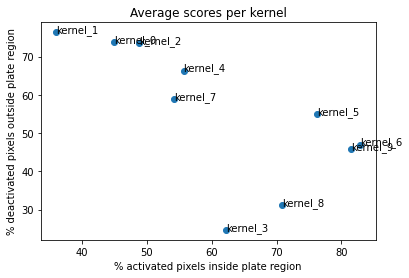

time: 291 ms


In [20]:
showResults("/content/model5_Trainset1results.csv")

Scores
[['kernel_0', 'kernel_1', 'kernel_2', 'kernel_3', 'kernel_4', 'kernel_5', 'kernel_6', 'kernel_7', 'kernel_8', 'kernel_9'], [47.50274578608058, 32.44803525669492, 44.44980907511138, 36.83237617143623, 78.85109476671242, 28.875918567504165, 45.79558625093236, 80.06081233003161, 85.25857175146707, 80.07996070926039], [24.935544795840748, 74.30173592361609, 26.713632116410512, 76.62075882098185, 29.50035148150554, 72.48378827363196, 28.002681280430984, 58.2931046856067, 48.075004026375666, 50.735300985634744]]


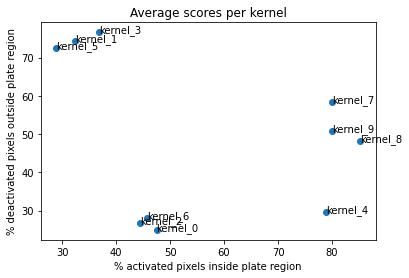

time: 333 ms


In [23]:
showResults("/content/model1_Trainset2results (2).csv")

Scores
[['kernel_0', 'kernel_1', 'kernel_2', 'kernel_3', 'kernel_4', 'kernel_5', 'kernel_6', 'kernel_7', 'kernel_8', 'kernel_9'], [17.87498983421357, 84.66202372525139, 80.40580900219521, 47.099408119391356, 53.360055955832365, 17.62347412544401, 20.485872757231068, 82.56529728009946, 80.97301340417957, 53.58718273001967], [51.872227297738384, 38.56294925989292, 37.48213542195923, 26.011146910650574, 23.69906996379676, 65.61572838077144, 57.345117791158714, 34.16232363405126, 43.8804670693973, 72.23847610885315]]


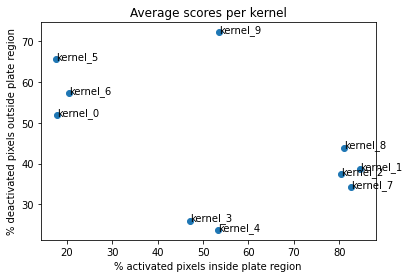

time: 296 ms


In [24]:
showResults("/content/model1_Trainset3results (3).csv")

Scores
[['kernel_0', 'kernel_1', 'kernel_2', 'kernel_3', 'kernel_4', 'kernel_5', 'kernel_6', 'kernel_7', 'kernel_8', 'kernel_9'], [65.09637575086784, 80.35148844108899, 82.2060909763162, 42.371802807451814, 10.407080569446046, 40.40491714097485, 88.92308468620746, 45.90916788282957, 46.42580723303439, 77.50277028178047], [19.53718767010836, 10.893541376081185, 38.8060175212519, 76.74515820855629, 72.97672282758185, 40.743679875952175, 39.68106963910522, 76.86289479617679, 76.44227770679416, 16.99805429517447]]


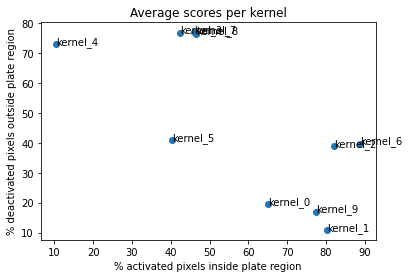

time: 368 ms


In [25]:
showResults("/content/model2_Trainset2results.csv")